<a href="https://colab.research.google.com/github/Rakeshscode/Data-Science/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

You would want to include a polynomial element to capture nonlinear relationships between variables. They can help fit curved patterns in data that a simple linear model would miss, leading to better predictions.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

You would not want to include a polynomial element because it could lead to overfitting. It could make the model too sensitive to small fluctuations in the data.

**Task3**:

What's the point of using b splines?

B-splines provide a flexible way to model complex relationships without the instability of high-degree polynomials.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

It's a predictor that doesn't assume a specific equation but uses the data and learns patterns from it.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [ ]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-1p4pgs6h
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-1p4pgs6h
  Resolved https://github.com/pydata/xarray.git to commit 4bbab48cacf94ff285475bd7b7abeea3b2ea888f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev16+g4bbab48c-py3-none-any.whl size=1255523 sha256=94e7cb4eaea0132a2cff9eda3fae39911aa187bafc4232edefff2dd2f7010e0a
  Stored in directory: /tmp/pip-ephem-wheel-cache-b9t7bjw0/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 1.4 MB/s eta 0:00:00
   ━

In [ ]:
num_knots = 6
knots = np.linspace(53.975,100, num_knots+2)[1:-1]
model_spline = bmb.Model("weight ~ bs(height, degree=3, knots=knots)", howell, family="negativebinomial")
idata_spline = model_spline.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


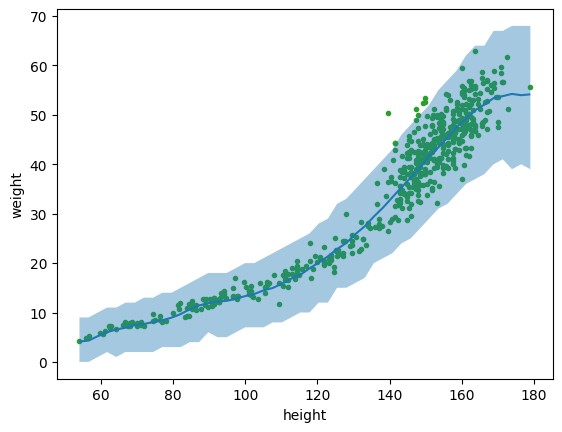

In [ ]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "height", pps=True)
#raw data
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned that Gaussian Processes can handle uncertain inputs and detect changepoints in time series data.

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

I chose the posterior predictive plot because it elegantly shows the GP's predictions, uncertainty, and ability to capture complex patterns like seasonality and long-term trends. It's cool because it not only fits the observed data but also provides a clear, probabilistic forecast into the future, making it both insightful and visually striking.